# <span id="toc">  Esercizio 4 - Molecular Dynamics NVE </span>

- [Esercizio 4.1](#ex04_1)

- [Esercizio 4.2](#ex04_2)

- [Esercizio 4.3](#ex04_3)


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import colorsys

In questo esercizio voglio studiare un sistema di particelle classiche interagenti tramite potenziale di Lennard–Jones 
mediante una simulazione di **Molecular Dynamic (MD)** nell’ensemble microcanonico **NVE**, ovvero in cui il numero di particelle $N$, il volume $V$ e l’energia totale $E$ sono costanti.

Dal punto di vista microscopico questo significa che si integrano nel tempo le equazioni del moto di Newton per ogni particella, evolvendo il sistema in modo deterministico e le proprietà termodinamiche si stimano come medie temporali lungo la traiettoria.

Le equazioni del moto vengono integrate con l’**algoritmo di Verlet**, che permette di calcolare le posizioni successive 
utilizzando quelle attuali e precedenti insieme alle accelerazioni con un passo di integrazione scelto $\delta = 0.001$.

I parametri principali che governano l’evoluzione del sistema sono:
- $T$: temperatura iniziale, collegata alla distribuzione delle velocità.
- $\rho$: densità ridotta del sistema.
- $r_\text{cut}$: raggio di cutoff oltre il quale le interazioni di Lennard–Jones vengono trascurate.

Nei punti a seguire eseguirò simulazioni per studiare l'evoluzione dinamica di un sistema di $N= 108$ particelle.

## <span id="ex04_1">  Esercizio 4.1 </span>[^](#toc)

L'obiettivo è calcolare numericamente la distribuzione delle velocità delle particelle e confrontarla con la legge teorica di Maxwell–Boltzmann, espressa in unità ridotte di Lennard–Jones $m=\epsilon=\sigma=k_B=1$:

$$
p(v,T) = \frac{4\pi}{(2\pi T)^{3/2}} \, v^2 \, e^{- \frac{v^2}{2T}}
$$

Ad ogni step si calcola per ogni particella il modulo della velocità $v_i$ e lo si accumula in un istogramma normalizzato, che viene costruito nell'intervallo $[0, v_{\max}]$ con $v_{\max} = 5 \sqrt{3T}$ e suddiviso in $30$ bin.

Questa scelta assicura che l’intervallo includa tutta la parte rilevante della distribuzione, mentre oltre $v_{\max}$ la probabilità è trascurabile.

## <span id="ex04_2">  Esercizio 4.2 </span>[^](#toc)

Considero ora un particolare sistema di particelle, ad esempio l'Argon in fase gassosa con:

- $T \approx 2.0 \quad \rho = 0.05 \quad r_{cut} = 5.0$


Il sistema è inizialmente preparato in uno stato fortemente ordinato, in cui le particelle sono poste su un reticolo cristallino fcc, quindi a bassa entropia.
Eseguendo una simulazioen MD voglio mostrare che questo sistema evolve nel tempo verso una configurazione più realistica, in cui la distribizione di velocità delle particelle segue la legge di Maxwell–Boltzmann.

Al termine della simulazione il codice salva sia le posizioni attuali raggiunte che quelle precedenti.
Grazie a questa struttura, tramite l’opzione ```restart``` è possibile ricaricare le posizioni di una simulazione precedente, così il Verlet dispone delle informazioni necessarie per continuare l’integrazione senza rigenerare casualmente le velocità iniziali.

### Fase di equilibrazione

L’energia totale $E$ del sistema resta costante, ma la suddivisione tra energia cinetica $K$ e potenziale $U$ può oscillare.  
Per il confronto con la curva teorica è quindi necessario utilizzare la temperatura effettiva $T_\text{eff}$, calcolata una volta che il sistema si è equilbrato.  

In questo esercizio ho scelto una temperatura iniziale $T$ tale che, durante l’evoluzione, il sistema si equilibrasse fino a raggiungere un valore di $T_\text{eff}$ vicino a quello desiderato.

In questa prima fase ho scelto i seguenti parametri:

```
4000  blocchi
1     step per blocco
1.85  temp
0.05  rho
5.0   r_cut
```

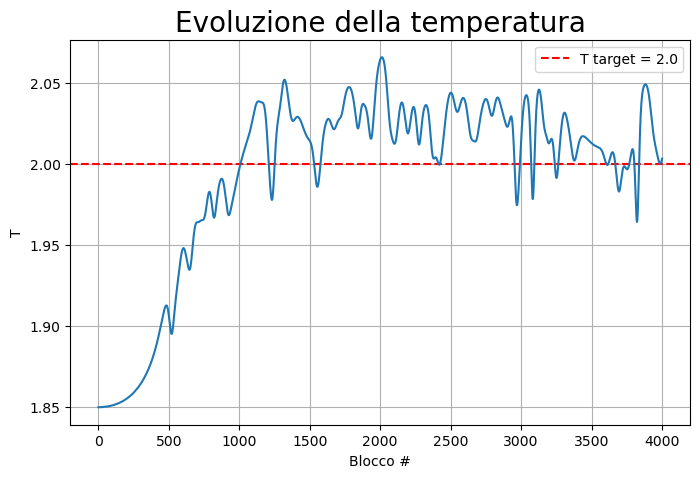

Valore della T effettiva dopo aver equilibrato il sistema = 2.00349


In [2]:
# Evoluzione temperatura
plt.figure(figsize=(8,5))

block, T = np.loadtxt('ex04_1_2/OUTPUT/equilibration/temperature.dat', skiprows=1, usecols=(0,1), unpack=True)

plt.axhline(y=2, color='red', linestyle='--', label='T target = 2.0')
plt.plot(block, T)
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('T', fontsize=10)
plt.title('Evoluzione della temperatura', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print('Valore della T effettiva dopo aver equilibrato il sistema =', T[-1])

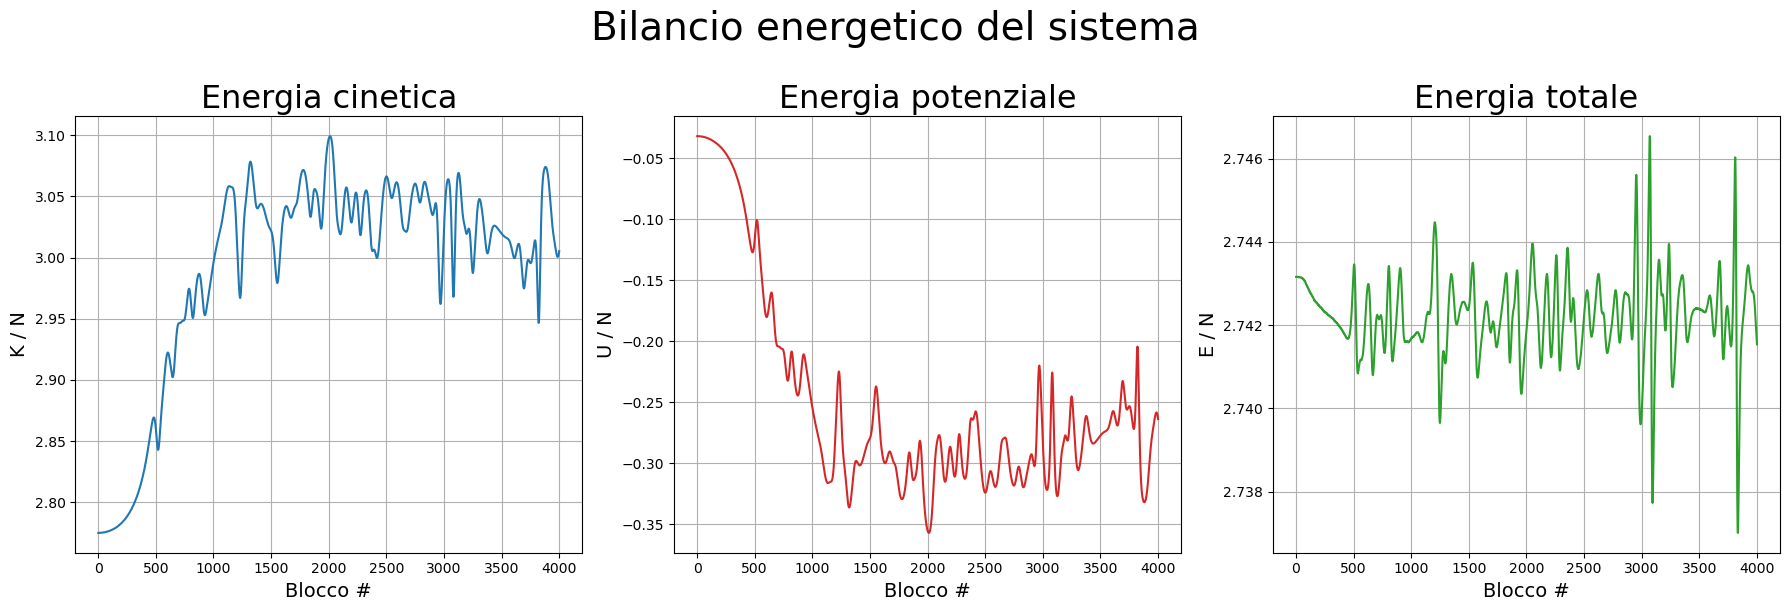

In [3]:
# Bilancio energetico
block, K = np.loadtxt('ex04_1_2/OUTPUT/equilibration/kinetic_energy.dat', skiprows=1, usecols=(0,1), unpack=True)
block, U = np.loadtxt('ex04_1_2/OUTPUT/equilibration/potential_energy.dat', skiprows=1, usecols=(0,1), unpack=True)
block, E = np.loadtxt('ex04_1_2/OUTPUT/equilibration/total_energy.dat', skiprows=1, usecols=(0,1), unpack=True)

fig, axs = plt.subplots(1,3,figsize=(18, 6))
fig.suptitle('Bilancio energetico del sistema', fontsize=28, y=1.01)

# Energia cinetica
axs[0].plot(block, K, color='tab:blue')
axs[0].set_xlabel('Blocco #', fontsize=14)
axs[0].set_ylabel('K / N', fontsize=14)
axs[0].set_title('Energia cinetica', fontsize=23)
axs[0].grid(True)

# Energia potenziale
axs[1].plot(block, U, color='tab:red')
axs[1].set_xlabel('Blocco #', fontsize=14)
axs[1].set_ylabel('U / N', fontsize=14)
axs[1].set_title('Energia potenziale', fontsize=23)
axs[1].grid(True)

# Energia totale
axs[2].plot(block, E, color='tab:green')
axs[2].set_xlabel('Blocco #', fontsize=14)
axs[2].set_ylabel('E / N', fontsize=14)
axs[2].set_title('Energia totale', fontsize=23)
axs[2].grid(True)

plt.tight_layout()
plt.show()

Dai grafici si osserva che il sistema raggiunge l’equilibrio dopo una fase transitoria iniziale (circa i primi $500–1000$ blocchi).  

La temperatura $T$ parte da un valore inferiore a quello target e cresce progressivamente come mi aspettavo fino a stabilizzarsi attorno a $T_\text{eff} \approx 2.0$.

Le energie cinetica $K$ e potenziale $U$ mostrano un andamento complementare l'una rispetto all'altra tipico dell'ensemble NVE, e una volta raggiunto l’equilibrio entrambe oscillano attorno a valori stazionari.
L'energia totale invece resta costante entro piccole fluttuazioni, confermando la buona conservazione dell’energia dell'algoritmo.  

Di seguito mostro un confronto tra la configurazione spaziale iniziale e quella finale dopo l’equilibrazione: a sinistra le particelle sono disposte sul reticolo ordinato, mentre a destra la distribuzione è più disordinata e omogenea come ci si aspetta in una fase gassosa all’equilibrio.

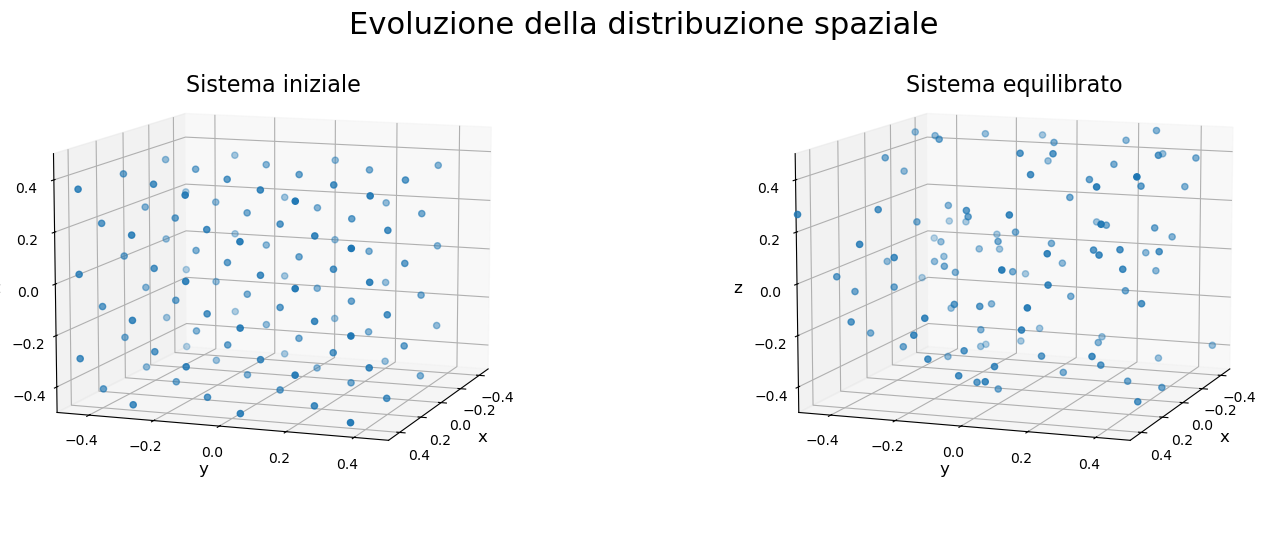

In [4]:
# Evoluzione spaziale
fig = plt.figure(figsize=(16,6))
plt.suptitle('Evoluzione della distribuzione spaziale', fontsize=22, y=0.9)

# Posizioni post-equilibrazione
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = np.loadtxt('ex04_1_2/OUTPUT/equilibration/CONFIG/config.fcc', skiprows=2, usecols=(1,2,3), unpack=True)
ax1.scatter(x, y, z, marker='o')
ax1.set_title('Sistema iniziale', fontsize=16, y=0.9)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('z', fontsize=12)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_zlim(-0.5, 0.5)
ax1.view_init(10, 20)

# Posizioni finali
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = np.loadtxt('ex04_1_2/OUTPUT/equilibration/CONFIG/config.xyz', skiprows=2, usecols=(1,2,3), unpack=True)
ax2.scatter(x, y, z, marker='o')
ax2.set_title('Sistema equilibrato', fontsize=16, y=0.9)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('z', fontsize=12)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
ax2.set_zlim(-0.5, 0.5)
ax2.view_init(10, 20)

plt.tight_layout()
plt.show()

### Distribuzione di velocità

In questa analisi sono ripartito dalle posizioni finali ottenute nella simulazione precedente utlizzando `restart`, avendo quindi il sistema già equilibrato alla temperatura effettiva $T_\text{eff}$ trovata in quella fase.  

A partire da queste condizioni iniziali ho stimato la distribuzione delle velocità del sistema in funzione del numero di blocchi, utilizzando i seguenti parametri nella simulazione:

```
50    blocchi
2000  step per blocco
```

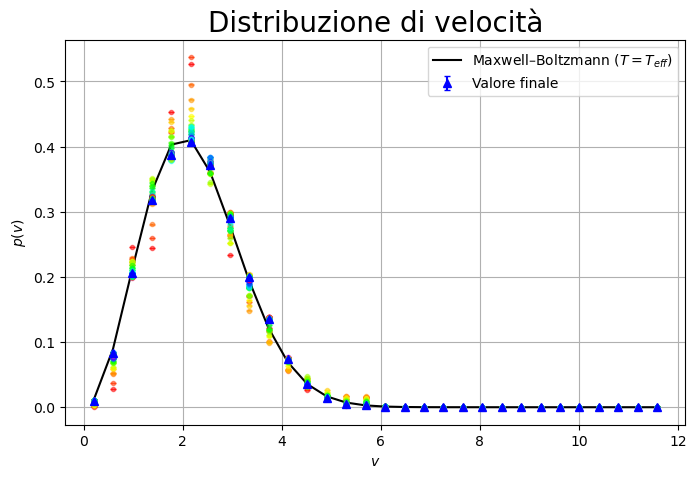

In [5]:
# Distribuzione di velocità
def maxwell_boltzmann(v, T):
    return 4*np.pi * (1/(2*np.pi*T))**1.5 * v**2 * np.exp(-v**2/(2*T))

v, pofv, err = np.loadtxt('ex04_1_2/OUTPUT/pofv/pofv.dat', skiprows=1, unpack=True)

n_bins = 30
n_points = len(v)
n_blocks = int(n_points/n_bins)
T_eff = T[-1:]

p_teo = maxwell_boltzmann(v[-n_bins:], T_eff)
norm = np.trapezoid(pofv[-n_bins:], v[-n_bins:]) / np.trapezoid(p_teo, v[-n_bins:])
p_teo *= norm

plt.figure(figsize=(8,5))

for i in range(n_blocks-1):
    rgb = colorsys.hsv_to_rgb(i*1/n_bins, 1.0, 1.0)
    start = i*n_bins
    end = (i+1)*n_bins
    plt.errorbar(v[start:end], pofv[start:end], yerr = err[start:end], fmt='.', color=rgb, alpha=0.5, capsize=2)
    
plt.errorbar(v[-n_bins:], pofv[-n_bins:], yerr = err[-n_bins:], fmt='^', color='blue', capsize=2, label='Valore finale')    
plt.plot(v[-n_bins:], p_teo, color='black', label='Maxwell–Boltzmann ($T = T_{eff}$)')    

plt.xlabel('$v$', fontsize=10)
plt.ylabel('$p(v)$', fontsize=10)
plt.title('Distribuzione di velocità', fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

Dal grafico si vede che la distribuzione numerica delle velocità converge progressivamente verso la curva teorica 
di Maxwell–Boltzmann calcolata alla stessa $T_\text{eff}$. In particolare i punti rossi corrispondono ai valori trovati nel blocco $1$, fino ad arrivare ai punti blu che corrispondono ai valori finali trovati nel blocco $50$. 

Il risultato finale mostra un buon accordo con la curva teorica, confermando che dopo l’equilibrazione il sistema segue la distribuzione prevista per un gas classico e che il numero di blocchi scelto è sufficiente per ottenere una buona convergenza.

## <span id="ex04_3">  Esercizio 4.3 </span>[^](#toc)

In quest'ultima sezione sono ripartito dallo stato finale equilibrato ottenuto nel primo punto e ho provato a far evolvere 
il sistema a ritroso nel tempo, invertendo i segni di tutte le velocità delle particelle.  
L’idea è verificare se il sistema, tornando indietro, riesca a ripercorrere la traiettoria fino a ricostruire la configurazione ordinata iniziale.

Per fare ciò ho preso le configurazioni finali del sistema equilibrato e ho invertito le velocità  $v_i \to - v_i$ per tutte le particelle, mantenendo inalterate le posizioni. Ho fatto infine evolvere nuovamente il sistema monitorando l’andamento dell'energia cinetica e dell'energia potenziale del sistema ad ogni blocco, per verificare se tornasse ai valori iniziali.

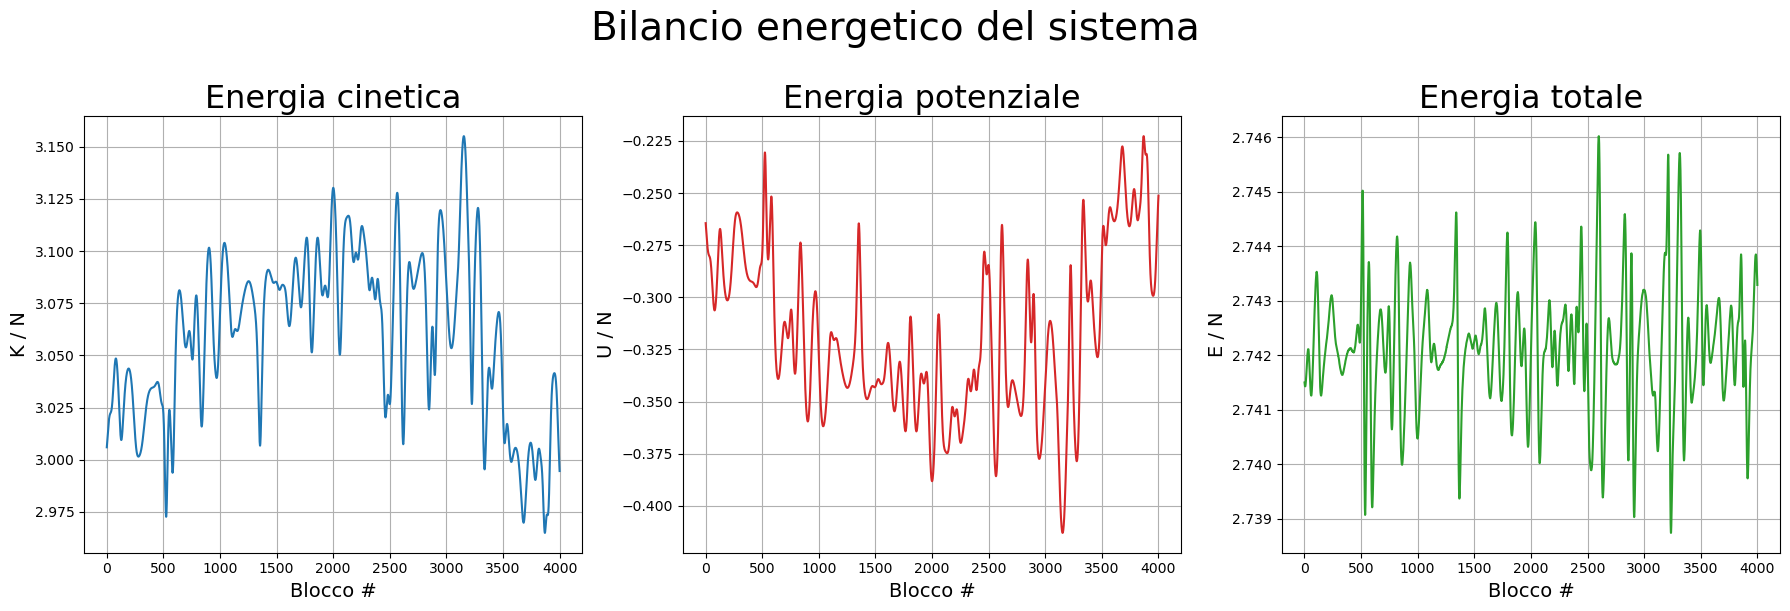

In [6]:
# Bilancio energetico (velocità inverse)
block, K = np.loadtxt('ex04_3/OUTPUT/inversion/kinetic_energy.dat', skiprows=1, usecols=(0,1), unpack=True)
block, U = np.loadtxt('ex04_3/OUTPUT/inversion/potential_energy.dat', skiprows=1, usecols=(0,1), unpack=True)
block, E = np.loadtxt('ex04_3/OUTPUT/inversion/total_energy.dat', skiprows=1, usecols=(0,1), unpack=True)

fig, axs = plt.subplots(1,3,figsize=(18, 6))
fig.suptitle('Bilancio energetico del sistema', fontsize=28, y=1.01)

# Energia cinetica
axs[0].plot(block, K, color='tab:blue')
axs[0].set_xlabel('Blocco #', fontsize=14)
axs[0].set_ylabel('K / N', fontsize=14)
axs[0].set_title('Energia cinetica', fontsize=23)
axs[0].grid(True)

# Energia potenziale
axs[1].plot(block, U, color='tab:red')
axs[1].set_xlabel('Blocco #', fontsize=14)
axs[1].set_ylabel('U / N', fontsize=14)
axs[1].set_title('Energia potenziale', fontsize=23)
axs[1].grid(True)

# Energia totale
axs[2].plot(block, E, color='tab:green')
axs[2].set_xlabel('Blocco #', fontsize=14)
axs[2].set_ylabel('E / N', fontsize=14)
axs[2].set_title('Energia totale', fontsize=23)
axs[2].grid(True)

plt.tight_layout()
plt.show()

Dai grafici si osserva che dopo l’inversione delle velocità, l’energia $K$ e $U$ oscillano attorno a valori medi che non corrispondono a quelli iniziali prima della fase di equilibrazione, segno che il sistema non sta realmente tornando indietro lungo la traiettoria originale.  

In teoria le equazioni di Newton sono reversibili, tuttavia nella pratica computazione il sistema subisce continuamente
fluttuazioni numeriche che non vengono compensate facendo un'integrazione a ritroso, quindi non ci si può aspettare un vero ritorno allo stato ordinato.

Di seguito mostro nuovamente un confronto tra la configurazione spaziale iniziale e quella finale dopo l'inversione delle velocità, in cui si vede chiaramente a sinistra che le particelle non tornano ad un reticolo ordinato ma restano disordinate.

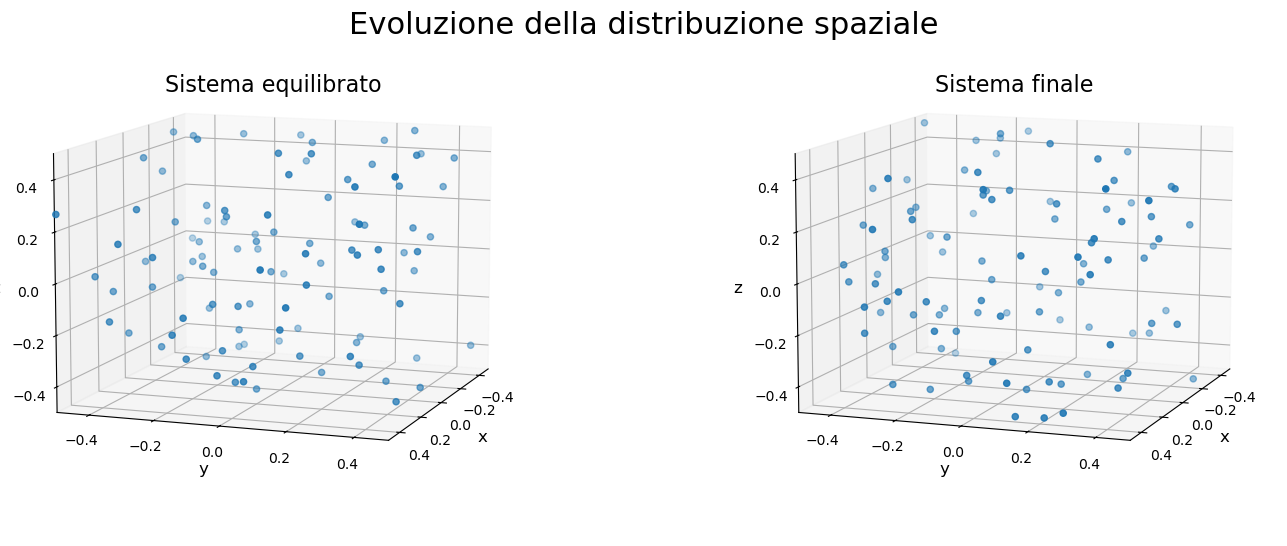

In [7]:
# Evoluzionie spaziale (velocità invesre)
fig = plt.figure(figsize=(16,6))
plt.suptitle('Evoluzione della distribuzione spaziale', fontsize=22, y=0.9)

# Posizioni post-equilibrazione
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x, y, z = np.loadtxt('ex04_1_2/OUTPUT/equilibration/CONFIG/config.xyz', skiprows=2, usecols=(1,2,3), unpack=True)
ax1.scatter(x, y, z, marker='o')
ax1.set_title('Sistema equilibrato', fontsize=16, y=0.9)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('z', fontsize=12)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-0.5, 0.5)
ax1.set_zlim(-0.5, 0.5)
ax1.view_init(10, 20)

# Posizioni finali
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
x, y, z = np.loadtxt('ex04_3/OUTPUT/inversion/CONFIG/config.xyz', skiprows=2, usecols=(1,2,3), unpack=True)
ax2.scatter(x, y, z, marker='o')
ax2.set_title('Sistema finale', fontsize=16, y=0.9)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.set_zlabel('z', fontsize=12)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
ax2.set_zlim(-0.5, 0.5)
ax2.view_init(10, 20)

plt.tight_layout()
plt.show()